In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Importing the modules
import matplotlib as plt
import seaborn as sns
import sklearn
import tensorflow as tf
import keras
from keras import layers

In [2]:
# Import TensorFlow into colab
import tensorflow as tf
import tensorflow_hub as hub
print("TF version: ", tf.__version__)
print("TF Hub version: ", hub.__version__)

# Check for GPU availability
print("GPU", "available (YESSSSSS!!!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :()")

TF version:  2.10.0
TF Hub version:  0.16.1
GPU available (YESSSSSS!!!!!!!)


In [3]:
import tensorflow as tf
import os

def is_supported_image(file_path):
    try:
        # Try opening the image using TensorFlow's decoding functions
        img = tf.io.read_file(file_path)
        img = tf.image.decode_jpeg(img, channels=3)  # Decode only JPEG files here
        return True
    except Exception as e:
        print(f"Error decoding image {file_path}: {e}")
        return False

# Path to your dataset folder
dataset_folder = 'C:/Users/vatsa/Downloads/Driver_drowsiness_detection/PreparedData'

# Loop through your dataset
for root, dirs, files in os.walk(dataset_folder):
    for file in files:
        file_ext = os.path.splitext(file)[1].lower()
        file_path = os.path.join(root, file)
        
        # Check for supported image formats
        if file_ext in ['.jpg', '.jpeg', '.png', '.bmp', '.gif']:
            # Check if the image can be decoded (i.e., not corrupt)
            if not is_supported_image(file_path):
                print(f"Removing corrupt file: {file_path}")
                os.remove(file_path)
        else:
            # Remove unsupported image files
            print(f"Removing unsupported file: {file_path}")
            os.remove(file_path)

print("Dataset cleaning complete!")

Dataset cleaning complete!


In [4]:
import os
import csv

# Define supported formats
supported_formats = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif']

# Path to your dataset folder
dataset_folder = 'C:/Users/vatsa/Downloads/Driver_drowsiness_detection/PreparedData'

# Output CSV file for labels
output_csv = 'image_labels.csv'

# Initialize a list to hold image paths and labels
image_data = []

# Loop through the dataset directory
for root, dirs, files in os.walk(dataset_folder):
    for file in files:
        # Get the file extension
        file_ext = os.path.splitext(file)[1].lower()
        
        # If the file is in supported formats, add it to the label list
        if file_ext in supported_formats:
            # Full image path
            file_path = os.path.join(root, file)
            # Extract the class label from the directory name (assuming each class is a folder)
            class_label = os.path.basename(root)
            # Append the image path and label to the list
            image_data.append([file_path, class_label])
        else:
            # Remove unsupported files
            file_path = os.path.join(root, file)
            print(f"Removing unsupported file: {file_path}")
            os.remove(file_path)

# Write the image paths and labels to the CSV file
with open(output_csv, mode='w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    # Write header
    writer.writerow(['Image Path', 'Label'])
    # Write image data
    writer.writerows(image_data)

print(f"Label generation complete! Labels saved to {output_csv}")

Label generation complete! Labels saved to image_labels.csv


In [5]:
df = pd.read_csv("image_labels.csv")

In [6]:
df.head()

,Image Path,Label
0,C:/Users/vatsa/Downloads/archive/Final/Prepare...,closeEye
1,C:/Users/vatsa/Downloads/archive/Final/Prepare...,closeEye
2,C:/Users/vatsa/Downloads/archive/Final/Prepare...,closeEye
3,C:/Users/vatsa/Downloads/archive/Final/Prepare...,closeEye
4,C:/Users/vatsa/Downloads/archive/Final/Prepare...,closeEye


In [7]:
df.tail()

,Image Path,Label
84893,C:/Users/vatsa/Downloads/archive/Final/Prepare...,openEye
84894,C:/Users/vatsa/Downloads/archive/Final/Prepare...,openEye
84895,C:/Users/vatsa/Downloads/archive/Final/Prepare...,openEye
84896,C:/Users/vatsa/Downloads/archive/Final/Prepare...,openEye
84897,C:/Users/vatsa/Downloads/archive/Final/Prepare...,openEye


In [8]:
df.describe()

,Image Path,Label
count,84898,84898
unique,84898,2
top,C:/Users/vatsa/Downloads/archive/Final/Prepare...,openEye
freq,1,42952


<Axes: xlabel='Label'>

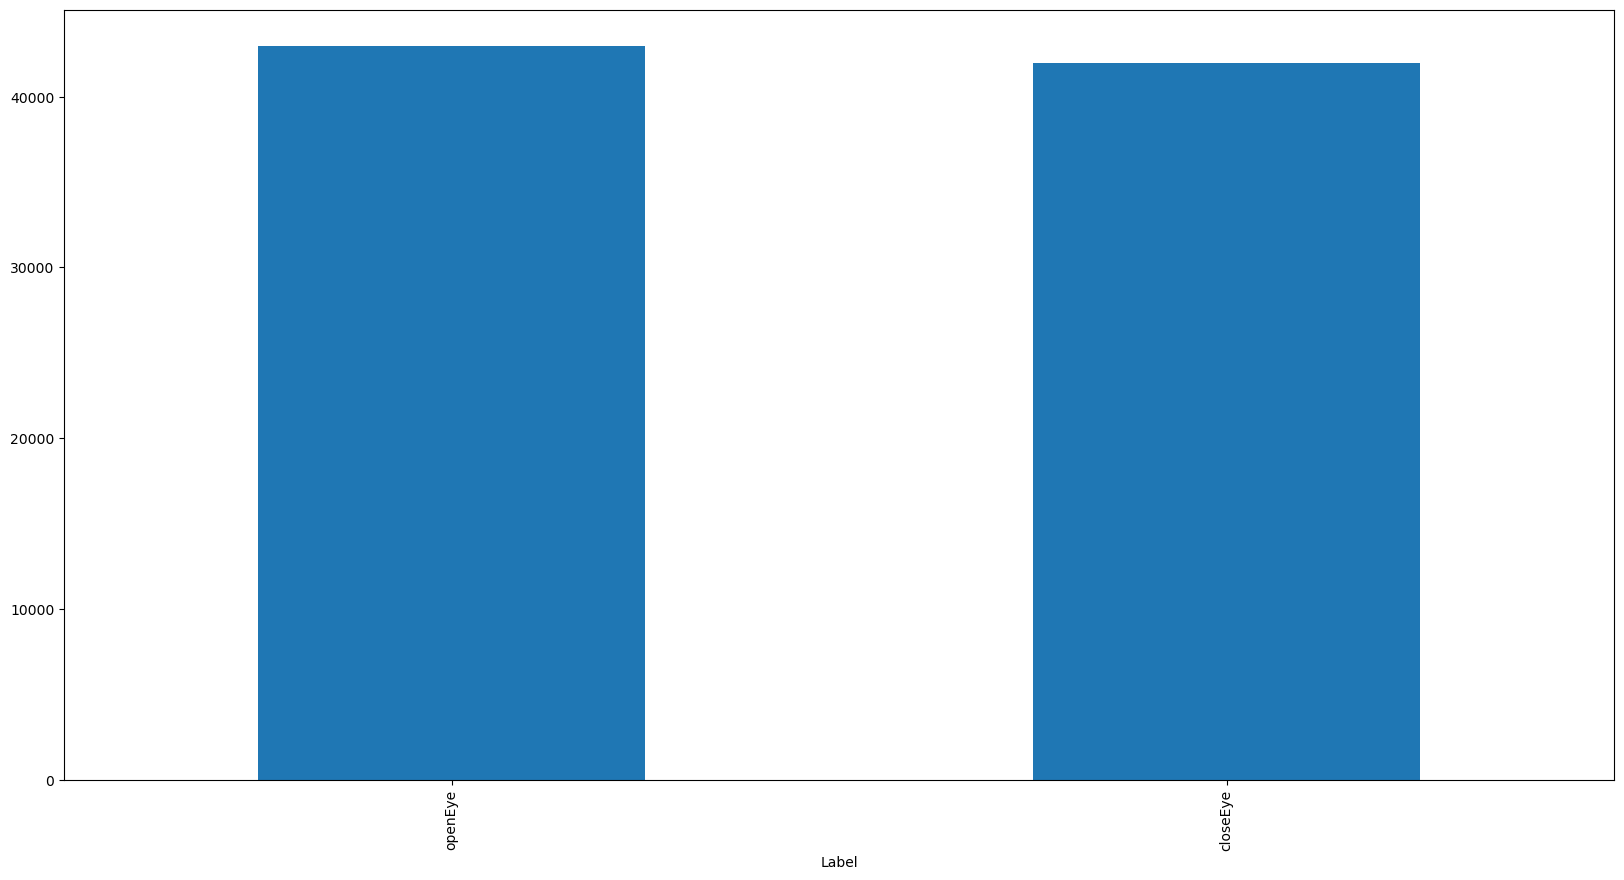

In [9]:
df["Label"].value_counts().plot.bar(figsize=(20, 10))

In [10]:
df["Label"].value_counts().median()

42449.0

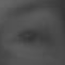

In [11]:
# Let's view  an image
from IPython.display import Image
Image("C:/Users/vatsa/Downloads/Driver_drowsiness_detection/PreparedData/train/openEye/s0029_00880_0_0_1_0_0_01.png")

In [12]:
# Create path names from image ID's
filenames = df["Image Path"]

# Check the first 10
filenames[:10]

0    C:/Users/vatsa/Downloads/archive/Final/Prepare...
1    C:/Users/vatsa/Downloads/archive/Final/Prepare...
2    C:/Users/vatsa/Downloads/archive/Final/Prepare...
3    C:/Users/vatsa/Downloads/archive/Final/Prepare...
4    C:/Users/vatsa/Downloads/archive/Final/Prepare...
5    C:/Users/vatsa/Downloads/archive/Final/Prepare...
6    C:/Users/vatsa/Downloads/archive/Final/Prepare...
7    C:/Users/vatsa/Downloads/archive/Final/Prepare...
8    C:/Users/vatsa/Downloads/archive/Final/Prepare...
9    C:/Users/vatsa/Downloads/archive/Final/Prepare...
Name: Image Path, dtype: object

In [13]:
len(os.listdir("C:/Users/vatsa/Downloads/Driver_drowsiness_detection/PreparedData"))

2

In [14]:
len(filenames)

84898

In [15]:
# Check whether number of filenames matches number of actual image files
import os
if len(df["Image Path"]) == len(filenames):
  print("Filenames match actual amount of files!!! Proceed.")
else:
  print("Filenames do not match actual amount of files, check the target directory.")

Filenames match actual amount of files!!! Proceed.


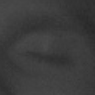

In [16]:
# One more check
Image(filenames[10082])

In [17]:
df["Label"][10082]

'closeEye'

In [18]:
import numpy as np
labels = df["Label"].to_numpy()
# labels = np.array(labels) # does same thing as above
labels

array(['closeEye', 'closeEye', 'closeEye', ..., 'openEye', 'openEye',
       'openEye'], dtype=object)

In [19]:
len(labels)

84898

In [20]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not match number of filenames")

Number of labels matches number of filenames!


In [21]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

2

In [22]:
unique_breeds

array(['closeEye', 'openEye'], dtype=object)

In [23]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2] 

[array([ True, False]), array([ True, False])]

In [24]:
len(boolean_labels)

84898

In [25]:
# Example turning boolean array into integers
print(labels[0]) # original labels
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample lable occurs

closeEye
(array([0], dtype=int64),)
0
[1 0]


In [26]:
print(labels[2])
print(boolean_labels[2].astype(int))

closeEye
[1 0]


In [27]:
filenames[:10]

0    C:/Users/vatsa/Downloads/archive/Final/Prepare...
1    C:/Users/vatsa/Downloads/archive/Final/Prepare...
2    C:/Users/vatsa/Downloads/archive/Final/Prepare...
3    C:/Users/vatsa/Downloads/archive/Final/Prepare...
4    C:/Users/vatsa/Downloads/archive/Final/Prepare...
5    C:/Users/vatsa/Downloads/archive/Final/Prepare...
6    C:/Users/vatsa/Downloads/archive/Final/Prepare...
7    C:/Users/vatsa/Downloads/archive/Final/Prepare...
8    C:/Users/vatsa/Downloads/archive/Final/Prepare...
9    C:/Users/vatsa/Downloads/archive/Final/Prepare...
Name: Image Path, dtype: object

In [28]:
boolean_labels[:2]

[array([ True, False]), array([ True, False])]

## Creating Validation Sets

In [29]:
# Setup X & y variables
x = filenames
y = boolean_labels

In [30]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:100000}

In [31]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)
len(x_train), len(y_train), len(x_val), len(y_val)

(800, 800, 200, 200)

In [32]:
# Let's have a geez at the trainig data
x_train[:5], y_train[:2]

(29     C:/Users/vatsa/Downloads/archive/Final/Prepare...
 535    C:/Users/vatsa/Downloads/archive/Final/Prepare...
 695    C:/Users/vatsa/Downloads/archive/Final/Prepare...
 557    C:/Users/vatsa/Downloads/archive/Final/Prepare...
 836    C:/Users/vatsa/Downloads/archive/Final/Prepare...
 Name: Image Path, dtype: object,
 [array([ True, False]), array([ True, False])])

## Preprocessing the images

In [33]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(78, 78)

In [34]:
tf.constant(image)

<tf.Tensor: shape=(78, 78), dtype=float32, numpy=
array([[0.36862746, 0.36862746, 0.37254903, ..., 0.10588235, 0.10588235,
        0.10588235],
       [0.36078432, 0.3647059 , 0.3647059 , ..., 0.10980392, 0.11372549,
        0.11372549],
       [0.36862746, 0.37254903, 0.37254903, ..., 0.10588235, 0.10980392,
        0.10588235],
       ...,
       [0.2784314 , 0.27058825, 0.25490198, ..., 0.18431373, 0.1764706 ,
        0.16470589],
       [0.28235295, 0.26666668, 0.25490198, ..., 0.18431373, 0.17254902,
        0.15686275],
       [0.28627452, 0.26666668, 0.25490198, ..., 0.18431373, 0.1764706 ,
        0.15686275]], dtype=float32)>

In [35]:
image.max(), image.min()

(0.4, 0.09803922)

In [36]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """

  # Read in an image file
  image = tf.io.read_file(image_path)
  # turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224,224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

## Turning the data into batches

In [37]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a typle of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [38]:
# Demo of above
(process_image(x[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.36862746, 0.36862746, 0.36862746],
         [0.36862746, 0.36862746, 0.36862746],
         [0.36862746, 0.36862746, 0.36862746],
         ...,
         [0.10588236, 0.10588236, 0.10588236],
         [0.10588236, 0.10588236, 0.10588236],
         [0.10588236, 0.10588236, 0.10588236]],
 
        [[0.3684524 , 0.3684524 , 0.3684524 ],
         [0.36845434, 0.36845434, 0.36845434],
         [0.36848482, 0.36848482, 0.36848482],
         ...,
         [0.10605744, 0.10605744, 0.10605744],
         [0.10605744, 0.10605744, 0.10605744],
         [0.10605744, 0.10605744, 0.10605744]],
 
        [[0.3657213 , 0.3657213 , 0.3657213 ],
         [0.36575374, 0.36575374, 0.36575374],
         [0.36625972, 0.36625972, 0.36625972],
         ...,
         [0.10878853, 0.10878853, 0.10878853],
         [0.10878853, 0.10878853, 0.10878853],
         [0.10878853, 0.10878853, 0.10878853]],
 
        ...,
 
        [[0.28482148, 0.28482148

In [39]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Create batches of our data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data nut dosn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches....")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x)))   # Only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

# If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches.....")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),    # filepaths
                                                 tf.constant(y)))   # labels

    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches......")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data =  data.map(get_image_label)

    # Turn the training data into batches 
    data_batch = data.batch(BATCH_SIZE)

  return data_batch

In [40]:
# Create training and validation data batches
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_val, y_val, valid_data=True)

Creating training data batches......
Creating validation data batches.....


In [41]:
# Check out the different attributes of our batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 2), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 2), dtype=tf.bool, name=None)))

## Visualization our data batches

In [42]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure 
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    #plt.axis("off")

In [43]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.bool, name=None))>

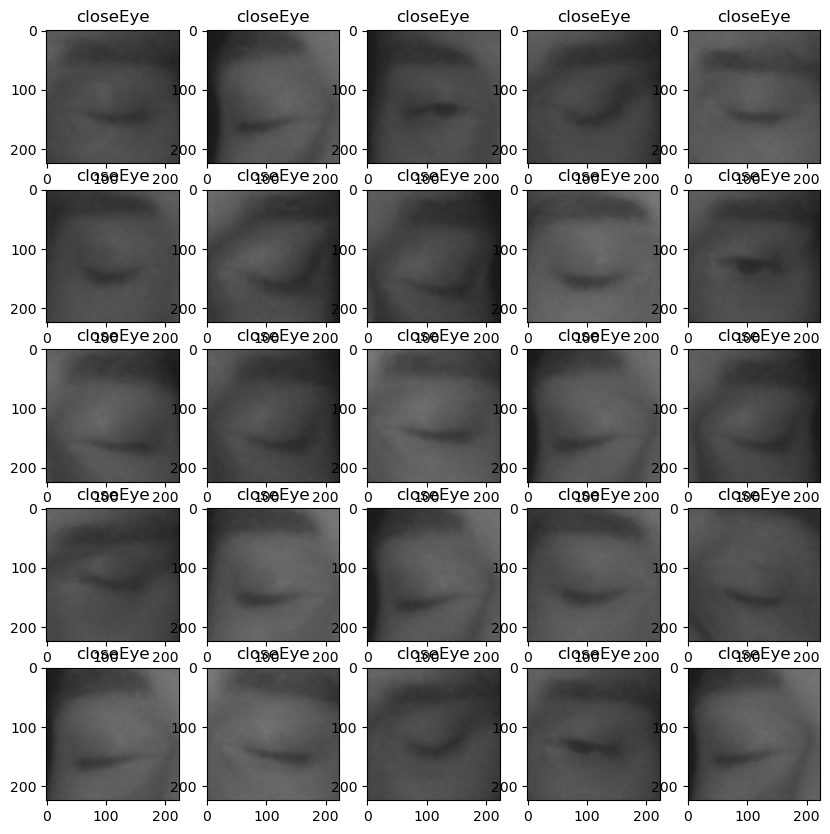

In [44]:
# Now let's visualize the data in a training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels) 

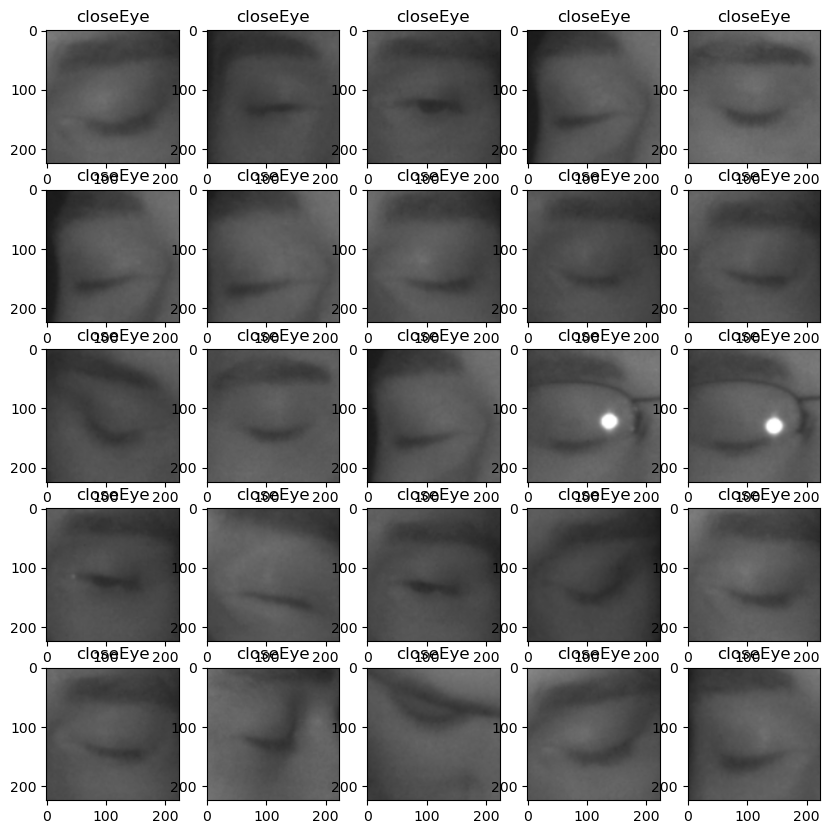

In [45]:
# Now let's visualize our validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a model

In [46]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]   # batch, height, width, colur channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

In [47]:
# Create a funtion which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with: ", MODEL_URL)

  # Setup the model 
  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL),    # Layer 1 (input layer)
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                            activation="softmax")   # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  ) 

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [48]:
model = create_model()
model.summary()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 2)                 2004      
                                                                 
Total params: 5,434,717
Trainable params: 2,004
Non-trainable params: 5,432,713
_________________________________________________________________


# Creating Callbacks

In [49]:
# Load TendoBoard notebook extension
%load_ext tensorboard

In [50]:
import os
import tensorflow as tf

def create_tensorboard_callback():
    # Create a directory for logs
    log_dir = "logs"
    os.makedirs(log_dir, exist_ok=True)
    
    # Create TensorBoard callback
    return tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# In your model training code
tensorboard = create_tensorboard_callback()

## Early stopping callbacks

In [51]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Training on Subset data

In [52]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10} 

In [53]:
# Check to make sure we're still running on a GPU
print("GPU", "available (YESSS!!!!!!!!!)" if tf.config.list_physical_devices("GPU") else "not available")

GPU available (YESSS!!!!!!!!!)


In [54]:
# Builds a function to train and return trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model

In [55]:
# Fit the model to the data
model = train_model()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
25/25 [==============================] - 57s 191ms/step - loss: 0.0493 - accuracy: 0.9812 - val_loss: 5.6710e-06 - val_accuracy: 1.0000
Epoch 2/100
25/25 [==============================] - 3s 118ms/step - loss: 3.1488e-06 - accuracy: 1.0000 - val_loss: 2.4526e-06 - val_accuracy: 1.0000
Epoch 3/100
25/25 [==============================] - 3s 117ms/step - loss: 2.2533e-06 - accuracy: 1.0000 - val_loss: 2.2631e-06 - val_accuracy: 1.0000
Epoch 4/100
25/25 [==============================] - 3s 124ms/step - loss: 2.1716e-06 - accuracy: 1.0000 - val_loss: 2.2452e-06 - val_accuracy: 1.0000


In [56]:
# Checking tensorboard logs
%tensorboard --logdir log

## Marking and Evaluation of predictions using trained model

In [57]:
val_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.bool, name=None))>

In [58]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 1s 100ms/step


array([[9.99999762e-01, 1.79666429e-07],
       [9.99999762e-01, 2.82846969e-07],
       [9.99999881e-01, 6.04137327e-08],
       [1.00000000e+00, 6.92671653e-09],
       [9.99999642e-01, 3.14382135e-07],
       [1.00000000e+00, 1.46211567e-08],
       [9.99999881e-01, 1.60205161e-07],
       [9.99999642e-01, 3.80833285e-07],
       [9.99997854e-01, 2.13268345e-06],
       [9.99999881e-01, 1.47616333e-07],
       [9.99999523e-01, 5.01158524e-07],
       [9.99999404e-01, 6.48904802e-07],
       [1.00000000e+00, 1.10435350e-08],
       [9.99999523e-01, 4.41767099e-07],
       [9.99987721e-01, 1.22904121e-05],
       [9.99999642e-01, 3.55366865e-07],
       [9.99999166e-01, 7.86082012e-07],
       [1.00000000e+00, 3.78970633e-08],
       [9.99999762e-01, 2.62568449e-07],
       [9.99999881e-01, 6.81150496e-08],
       [9.99999762e-01, 2.01256398e-07],
       [9.99998331e-01, 1.70291923e-06],
       [1.00000000e+00, 2.21161258e-08],
       [1.00000000e+00, 1.51619250e-08],
       [1.000000

In [59]:
np.sum(predictions[0])

0.99999994

In [60]:
# First prediction
index = 42
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[1.0000000e+00 2.5211971e-08]
Max value (probability of prediction): 1.0
Sum: 1.0
Max index: 0
Predicted label: closeEye


In [63]:
unique_breeds

array(['closeEye', 'openEye'], dtype=object)

In [64]:
# Turn predictions probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

  # Get a prediction label based on an array of prediction probabilities
  pred_label = get_pred_label(predictions[81])
  pred_label

In [65]:
val_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.bool, name=None))>

In [66]:
# Create a function to unbatch a batch dataset 
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns seperate arrays of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.48235297, 0.48235297, 0.48235297],
         [0.4809524 , 0.4809524 , 0.4809524 ],
         [0.47478995, 0.47478995, 0.47478995],
         ...,
         [0.20770313, 0.20770313, 0.20770313],
         [0.20462188, 0.20462188, 0.20462188],
         [0.20392159, 0.20392159, 0.20392159]],
 
        [[0.48130256, 0.48130256, 0.48130256],
         [0.48002705, 0.48002705, 0.48002705],
         [0.4744148 , 0.4744148 , 0.4744148 ],
         ...,
         [0.20735298, 0.20735298, 0.20735298],
         [0.20427173, 0.20427173, 0.20427173],
         [0.20357144, 0.20357144, 0.20357144]],
 
        [[0.4766807 , 0.4766807 , 0.4766807 ],
         [0.47595543, 0.47595543, 0.47595543],
         [0.47276413, 0.47276413, 0.47276413],
         ...,
         [0.20581238, 0.20581238, 0.20581238],
         [0.20273113, 0.20273113, 0.20273113],
         [0.20203084, 0.20203084, 0.20203084]],
 
        ...,
 
        [[0.31197476, 0.31197476, 0.31197476],
         [0.3124937 , 0.3124937 , 0.31249

In [67]:
get_pred_label(val_labels[0])

'closeEye'

In [68]:
images_ = []
labels_ = []

# Loop through unbatch data
for image, label in val_data.unbatch().as_numpy_iterator():
  images_.append(image)
  labels_.append(label)
  print(label)

images_[0], labels_[0]

[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True

(array([[[0.48235297, 0.48235297, 0.48235297],
         [0.4809524 , 0.4809524 , 0.4809524 ],
         [0.47478995, 0.47478995, 0.47478995],
         ...,
         [0.20770313, 0.20770313, 0.20770313],
         [0.20462188, 0.20462188, 0.20462188],
         [0.20392159, 0.20392159, 0.20392159]],
 
        [[0.48130256, 0.48130256, 0.48130256],
         [0.48002705, 0.48002705, 0.48002705],
         [0.4744148 , 0.4744148 , 0.4744148 ],
         ...,
         [0.20735298, 0.20735298, 0.20735298],
         [0.20427173, 0.20427173, 0.20427173],
         [0.20357144, 0.20357144, 0.20357144]],
 
        [[0.4766807 , 0.4766807 , 0.4766807 ],
         [0.47595543, 0.47595543, 0.47595543],
         [0.47276413, 0.47276413, 0.47276413],
         ...,
         [0.20581238, 0.20581238, 0.20581238],
         [0.20273113, 0.20273113, 0.20273113],
         [0.20203084, 0.20203084, 0.20203084]],
 
        ...,
 
        [[0.31197476, 0.31197476, 0.31197476],
         [0.3124937 , 0.3124937 , 0.31249

In [74]:
len(labels)

84898

In [75]:
get_pred_label(labels_[2])

'closeEye'

In [76]:
get_pred_label(predictions[2])

'closeEye'

In [77]:
def plot_preds(prediction_probabilities, labels, images, n=1):
  """
  View the predictions, ground truth, and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
        
  # Change plot title to be predicted, probability of prediction, and true label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

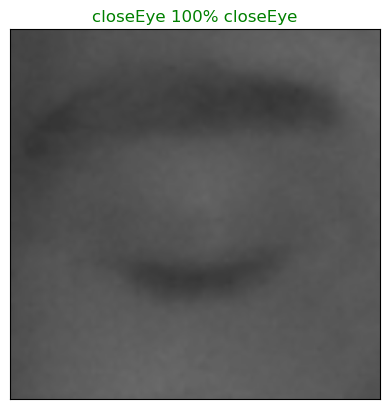

In [78]:
plot_preds(prediction_probabilities=predictions,
           labels=val_labels,
           images=val_images,
           n=77)

In [79]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
    """
    Plus the top 10 highest prediction confidences along with the truth label for sample n.
    """
    pred_prob, true_label = prediction_probabilities[n], labels[n]
    
    #  Get the predicted label
    pred_label = get_pred_label(pred_prob)
    
    # Find the top 10 prediction confidence indexes
    top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
    # Find the top 10 predictions confidence values
    top_10_pred_values = pred_prob[top_10_pred_indexes]
    # Find the top 10 prediction labels
    top_10_pred_labels = unique_breeds[top_10_pred_indexes]
    
    # Setup plot
    top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                       top_10_pred_values,
                       color="grey")
    plt.xticks(np.arange(len(top_10_pred_labels)),
              labels=top_10_pred_labels,
              rotation="vertical")
    
    # Change the color of true label
    if np.isin(true_label, top_10_pred_labels):
        top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
    else:
        pass

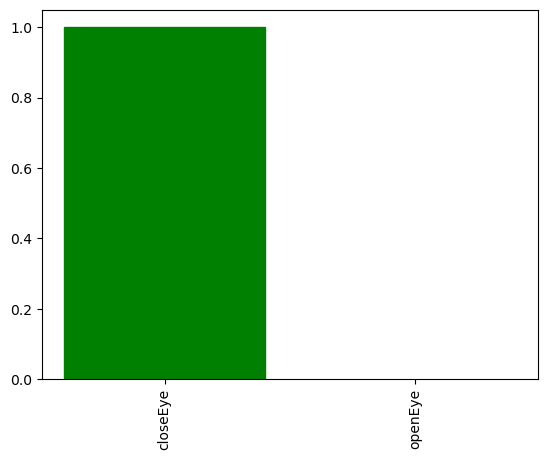

In [80]:
plot_pred_conf(prediction_probabilities=predictions,
              labels=val_labels,
              n=9)

In [81]:
predictions[0]

array([9.9999976e-01, 1.7966643e-07], dtype=float32)

In [82]:
predictions[0][predictions[0].argsort()[-10:]]
               
# This line just make the array in decending order
predictions[0][predictions[0].argsort()[-10:][::-1]]

array([9.9999976e-01, 1.7966643e-07], dtype=float32)

In [83]:
unique_breeds[predictions[0].argsort()[-10:][::-1]]

array(['closeEye', 'openEye'], dtype=object)

In [84]:
def plot_pred(prediction_probabilities, labels, images, n=1):
    """
    View the predictions, ground truth and image for sample n
    """
    pred_prob, truth_label, image = prediction_probabilities[n], labels[n], images[n]

    # Get the pred label
    pred_label = get_pred_label(pred_prob)

    # Plot image & remove ticks
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

    # Change the color of the title depending on if the prediction is right or wrong 
    if pred_label == truth_label:
        color = "green"
    else:
        color = "red"

    # Change plot title to be predicted, probability of prediction and truth label
    plt.title("{} {:2.0f}% {}".format(pred_label,
                                      np.max(pred_prob)*100,
                                      truth_label),
                                      color=color)

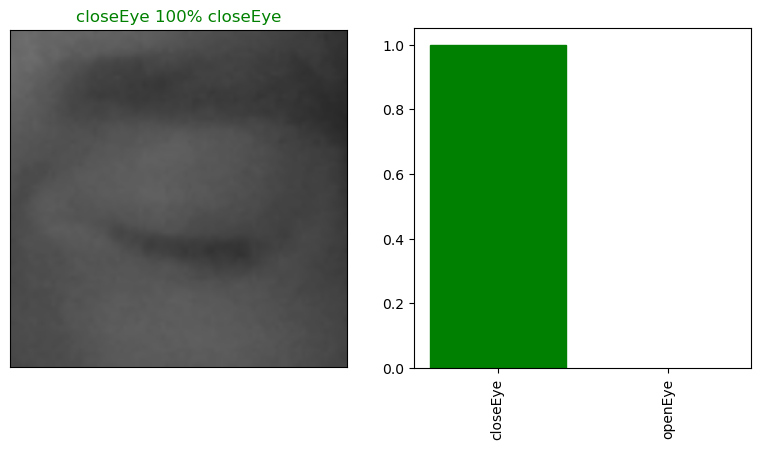

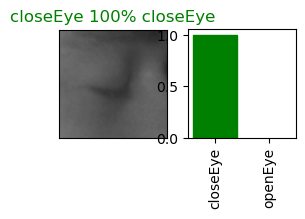

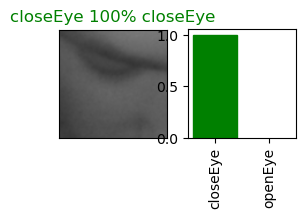

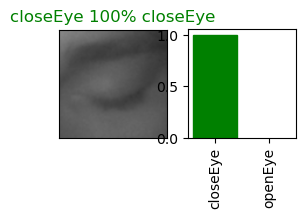

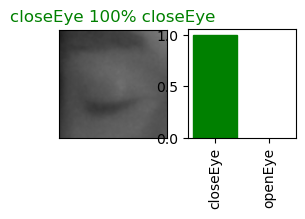

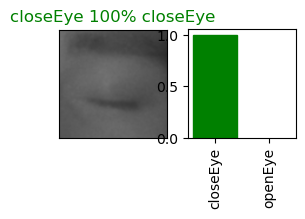

In [85]:
# let's check out a few predictions and their different values
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_pred(prediction_probabilities=predictions,
             labels=val_labels,
             images=val_images,
             n=i+i_multiplier)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_pred_conf(prediction_probabilities=predictions,
                  labels=val_labels,
                  n=i+i_multiplier)
    #plt.tight_layout(h_pad=1.0)
    plt.show()

## Saving and reloading a trained model

In [86]:
import os

current_directory = os.getcwd()
print("Current directory:", current_directory)

Current directory: c:\Users\vatsa\Downloads\archive\Final


In [87]:
import os
import datetime

def save_model(model, suffix=None):
    """ 
    Saves a given model in a models dictionary and appends a suffix (string). 
    """
    # Create a model directory pathname with current time
    modeldir = os.path.join("model", datetime.datetime.now().strftime("%Y%m%d-%H%M"))
    model_path = modeldir + "-" + suffix + ".h5"  # save format of model
    print(f"Saving model to: {model_path}...")
    model.save(model_path)
    return model_path

In [88]:
# Create a function to load a trained model 
def load_model(model_path):
    """
    Loads a saved model from a specified path. 
    """
    print(f"Loading saved model from: {model_path}")
    model = tf.keras.models.load_model(model_path,
                                      custom_objects={"KerasLayer": hub.KerasLayer})
    return model

In [89]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")

Saving model to: model\20241227-1946-1000-images-mobilenetv2-Adam.h5...


'model\\20241227-1946-1000-images-mobilenetv2-Adam.h5'

In [90]:
Loaded_1000_image_model = load_model("C:/Users/vatsa/Downloads/Driver_drowsiness_detection/model/20241227-1946-1000-images-mobilenetv2-Adam.h5")

Loading saved model from: C:/Users/vatsa/Downloads/archive/Final/model/20241227-1946-1000-images-mobilenetv2-Adam.h5


In [91]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 71ms/step - loss: 2.2452e-06 - accuracy: 1.0000


[2.2452222765423357e-06, 1.0]

## Training on full data

In [92]:
len(x), len(y)

(84898, 84898)

In [93]:
x[:10]

0    C:/Users/vatsa/Downloads/archive/Final/Prepare...
1    C:/Users/vatsa/Downloads/archive/Final/Prepare...
2    C:/Users/vatsa/Downloads/archive/Final/Prepare...
3    C:/Users/vatsa/Downloads/archive/Final/Prepare...
4    C:/Users/vatsa/Downloads/archive/Final/Prepare...
5    C:/Users/vatsa/Downloads/archive/Final/Prepare...
6    C:/Users/vatsa/Downloads/archive/Final/Prepare...
7    C:/Users/vatsa/Downloads/archive/Final/Prepare...
8    C:/Users/vatsa/Downloads/archive/Final/Prepare...
9    C:/Users/vatsa/Downloads/archive/Final/Prepare...
Name: Image Path, dtype: object

In [95]:
len(x_train)

800

In [96]:
y[:2]

[array([ True, False]), array([ True, False])]

In [97]:
# Create a data batch with the full data set
full_data = create_data_batches(x, y)

Creating training data batches......


In [98]:
full_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.bool, name=None))>

In [99]:
# Create a model for full model
full_model = create_model()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [100]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set whentraining on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [101]:
# Fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard ,full_model_early_stopping])

Epoch 1/100
2654/2654 [==============================] - 213s 79ms/step - loss: 0.1090 - accuracy: 0.9602
Epoch 2/100
2654/2654 [==============================] - 219s 83ms/step - loss: 0.0864 - accuracy: 0.9697
Epoch 3/100
2654/2654 [==============================] - 218s 82ms/step - loss: 0.0812 - accuracy: 0.9713
Epoch 4/100
2654/2654 [==============================] - 221s 83ms/step - loss: 0.0781 - accuracy: 0.9723
Epoch 5/100
2654/2654 [==============================] - 217s 82ms/step - loss: 0.0778 - accuracy: 0.9725
Epoch 6/100
2654/2654 [==============================] - 220s 83ms/step - loss: 0.0753 - accuracy: 0.9741
Epoch 7/100
2654/2654 [==============================] - 228s 86ms/step - loss: 0.0738 - accuracy: 0.9743
Epoch 8/100
2654/2654 [==============================] - 226s 85ms/step - loss: 0.0746 - accuracy: 0.9739
Epoch 9/100
2654/2654 [==============================] - 225s 85ms/step - loss: 0.0722 - accuracy: 0.9745
Epoch 10/100
2654/2654 [======================

In [102]:
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

Saving model to: model\20241227-2054-full-image-set-mobilenetv2-Adam.h5...


'model\\20241227-2054-full-image-set-mobilenetv2-Adam.h5'

In [103]:
# Load the full model
loaded_full_model = load_model("C:/Users/vatsa/Downloads/Driver_drowsiness_detection/model/20241227-2054-full-image-set-mobilenetv2-Adam.h5")

Loading saved model from: C:/Users/vatsa/Downloads/archive/Final/model/20241227-2054-full-image-set-mobilenetv2-Adam.h5


## Making predictions on Custom images

In [104]:
# Get custom image fielpaths
custom_path = "custom_testing/"
custom_image_path = [custom_path + fname for fname in os.listdir(custom_path)]

In [105]:
custom_image_path

['custom_testing/s0005_00635_0_0_0_0_1_01.png',
 'custom_testing/s0005_00636_0_0_0_0_0_01.png',
 'custom_testing/s0005_00638_0_0_0_0_0_01.png',
 'custom_testing/s0005_00639_0_0_0_0_0_01.png',
 'custom_testing/s0023_00117_0_0_1_0_1_01.png',
 'custom_testing/s0023_00118_0_0_1_0_1_01.png',
 'custom_testing/s0023_00119_0_0_1_0_1_01.png',
 'custom_testing/s0023_00120_0_0_1_0_1_01.png']

In [106]:
# Turn custom images into batch datasets
custom_data = create_data_batches(custom_image_path, test_data=True)
custom_data

Creating test data batches....


<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [107]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

1/1 [==============================] - 1s 1s/step


In [108]:
custom_preds

array([[9.9202335e-01, 7.9766968e-03],
       [9.9988842e-01, 1.1158029e-04],
       [9.9892151e-01, 1.0784803e-03],
       [9.9975854e-01, 2.4145370e-04],
       [6.2348832e-08, 9.9999988e-01],
       [2.8221986e-10, 1.0000000e+00],
       [7.6861255e-07, 9.9999928e-01],
       [2.3626093e-10, 1.0000000e+00]], dtype=float32)

In [109]:
custom_preds.shape

(8, 2)

In [110]:
# Get custom image prediction labels
custom_preds_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_preds_labels

['closeEye',
 'closeEye',
 'closeEye',
 'closeEye',
 'openEye',
 'openEye',
 'openEye',
 'openEye']

In [111]:
# get custom images (our batchify() function won't work since there aren't labels.... maybe we could fix this later)
custom_images = []

# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
    custom_images.append(image)

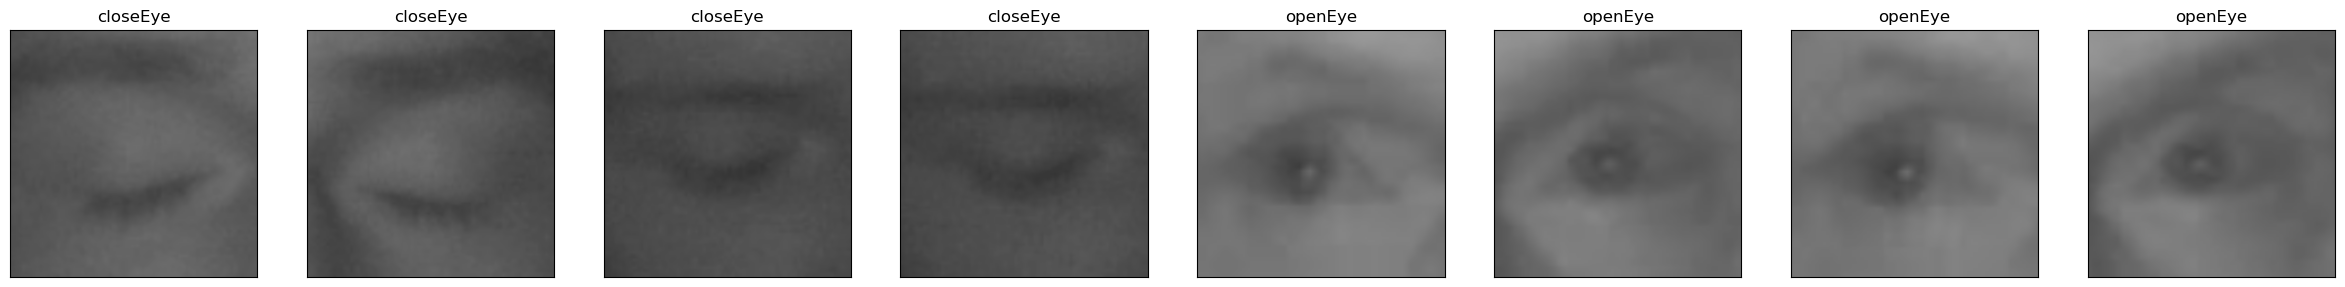

In [112]:
# Check custom image predictions
plt.figure(figsize=(30, 30))
for i, image in enumerate(custom_images):
    plt.subplot(1, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(custom_preds_labels[i])
    plt.imshow(image)